# C3-3 Traitement d'image par convolution


(Exemples et image extraite de Wikipédia, par Michael Plotke — Travail personnel, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24301122)

## Produit de convolution

Le traitement d'image utilise beaucoup une opération nommée **produit de convolution** pour modifier des images. Il consiste à transformer chaque pixel de l'image en le résultat du produit de convolution de chaque imagette centrée autour du pixel par une autre imagette, fixée sur toute l'image, appelée **noyau de convolution**. 

Le produit de convolution des deux imagettes $A$ et $B$ de même taille $k \times k$ considérées sous formes matricielle est donné par le scalaire : 

$$ A*B = \sum_{i=1}^k \sum_{j=1}^k a_{i,j} b_{k-i+1,k-j+1} $$

Différents noyaux permettent d'obtenir des rendus différents en fonction de l'effet désiré. 

## Exemples en noir et blanc

In [1]:
def conv(A,B):
    k = len(A)
    s = 0
    for i in range(k):
        for j in range(k):
            s = s + A[i][j]*B[k-i-1][k-j-1]
    return s

In [2]:
def filtre_convolution(image,noyau):
    n = len(image)
    m = len(image[0])
    k = len(noyau)
    copie = [ ligne[:] for ligne in image ]
    for i in range((k-1)//2,n-(k-1)//2):
        for j in range((k-1)//2,m-(k-1)//2):
            imagette = [ ligne[j-(k-1)//2:j+(k+1)//2] for ligne in image[i-(k-1)//2:i+(k+1)//2] ]
            c = conv(imagette,noyau)
            copie[i][j] = c
    return copie
    

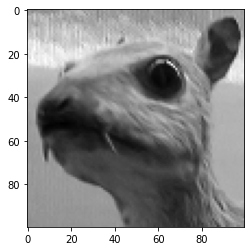

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = (mpimg.imread('animal.png')).tolist()
# im = (mpimg.imread('lena.png')).tolist()
plt.imshow(im,cmap='gray')
plt.show()

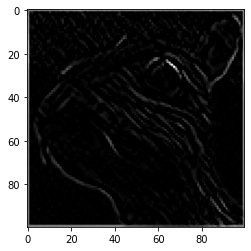

In [5]:
# kernel = [ [0,0,0], [0,1,0], [0,0,0] ]
kernel = [ [1,0,-1], [0,0,0], [-1,0,1] ] 
convolution = filtre_convolution(im,kernel)

plt.imshow(convolution,cmap='gray',vmin=0,vmax=1)
plt.show()

In [6]:
def inversion(image):
    n = len(image)
    m = len(image[0])
    for i in range(n):
        for j in range(m):
            image[i][j] = 1 - image[i][j]

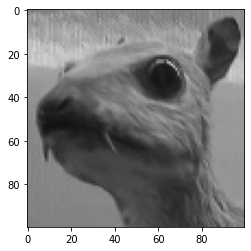

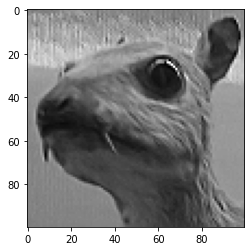

In [22]:
#kernel = [ [0,0,0], [0,1,0], [0,0,0] ] # identité

# kernel = [ [1,0,-1], [0,0,0], [-1,0,1] ] # contours
# kernel = [ [0,1,0], [1,-4,1], [0,1,0] ]  # contours 2
# kernel = [ [-1,-1,-1], [-1,8,-1], [-1,-1,-1] ] # contours 3

# kernel = [ [1,0,-1], [0,0,0], [1,0,-1] ] # contours verticaux
#kernel = [ [1,0,1], [0,0,0], [-1,0,-1] ] # contours horizontaux

# kernel = [ [0,-1,0], [-1,5,-1], [0,-1,0] ] # netteté

# kernel = [ [-1,-1,-1], [-1,9,-1], [-1,-1,-1] ] # test


#kernel = [ [1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9] ] # flou par moyennage
#kernel = [ [1/16,2/16,1/16], [2/16,4/16,2/16], [1/16,2/16,1/16] ] # flou par approximation gaussienne
kernel = [ [-1/256, -4/256, -6/256, -4/256, -1/256], [-4/256, -16/256, -24/256, -16/256, -4/256], [-6/256, -24/256, 476/256, -24/256, -6/256], [-4/256, -16/256, -24/256, -16/256, -4/256], [-1/256, -4/256, -6/256, -4/256, -1/256]] # masque flou

convolution = filtre_convolution(im,kernel)
# inversion(convolution)

plt.imshow(im,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(convolution,cmap='gray',vmin=0,vmax=1)
plt.show()

## Exemples en couleur

Pour traiter des images couleurs, possédant 3 canaux encodant le rouge (Red), le vert (Green) et le bleu (Blue), on traite séparément chacun des 3 canaux. 

In [23]:
def extraction_rgb(image):
    n = len(image)
    m = len(image[0])
    R = [ [0]*m for _ in range(n) ]
    G = [ [0]*m for _ in range(n) ]
    B = [ [0]*m for _ in range(n) ]
    for i in range(n):
        for j in range(m):
            R[i][j], G[i][j], B[i][j] = image[i][j][0], image[i][j][1], image[i][j][2]
    return R, G, B
            

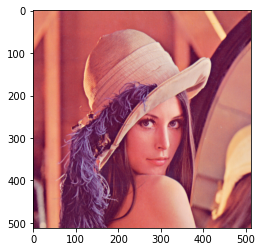

In [33]:
im = (mpimg.imread('animal-color.png')).tolist()
im = (mpimg.imread('lena-color.png')).tolist()
plt.imshow(im)
plt.show()

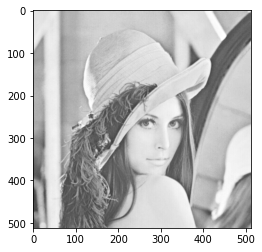

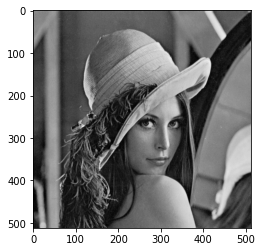

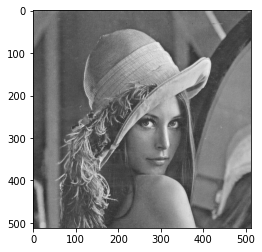

In [25]:
R,G,B = extraction_rgb(im)
plt.imshow(R,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(G,cmap='gray')
plt.show()
plt.imshow(B,cmap='gray')
plt.show()

In [26]:
def recombinaison_rgb(R,G,B):
    n = len(R)
    m = len(R[0])
    RGB = [ ligne[:] for ligne in R ]
    for i in range(n):
        for j in range(m):
            RGB[i][j] = [ R[i][j], G[i][j], B[i][j] ]
    return RGB

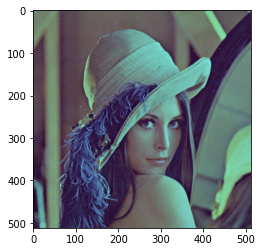

In [27]:
R,G,B = extraction_rgb(im)
n = len(R)
m = len(R[0])
R2 = [ ligne[:] for ligne in R ]
for i in range(n):
    for j in range(n):
        R2[i][j] = R[i][j]/2

image_bis = recombinaison_rgb(R2,G,B)
plt.imshow(image_bis)
plt.show()        

In [28]:
def filtre_convolution_rgb(image,noyau):
    R, G, B = extraction_rgb(image)
    Rf = filtre_convolution(R,noyau)
    Gf = filtre_convolution(G,noyau)
    Bf = filtre_convolution(B,noyau)
    convolution = recombinaison_rgb(Rf,Gf,Bf)
    return convolution

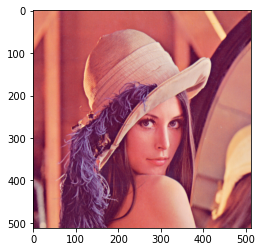

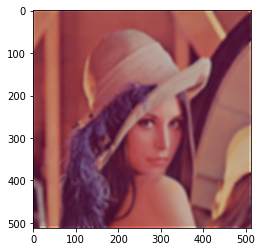

In [35]:
# kernel = [ [0,0,0], [0,1,0], [0,0,0] ] # identité

#kernel = [ [0,-1,0], [-1,5,-1], [0,-1,0] ] # netteté

#kernel = [ [1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9] ] # flou par moyennage

k = 10
kernel = [ [1/k**2]*k for _ in range(k) ]
#kernel = [ [1/16,2/16,1/16], [2/16,4/16,2/16], [1/16,2/16,1/16] ] # flou par approximation gaussienne
#kernel = [ [-1/256, -4/256, -6/256, -4/256, -1/256], [-4/256, -16/256, -24/256, -16/256, -4/256], [-6/256, -24/256, 476/256, -24/256, -6/256], [-4/256, -16/256, -24/256, -16/256, -4/256], [-1/256, -4/256, -6/256, -4/256, -1/256]] # masque flou

convolution = filtre_convolution_rgb(im,kernel)

plt.imshow(im)
plt.show()
plt.imshow(convolution)
plt.show()